In [1]:
#@title  { form-width: "30%" }

max_scale = 2.5 #@param {type:"number"}
min_scale = 0.8 #@param {type:"number"}
gauss_var = 0.3 #@param {type:"number"}


In [2]:
def shuffle_pixel(batch,images,L,idx):
    #input: image batchxLxL
    #output: image batchxLxL (after shuffling)

    images=images.reshape(batch,L*L)

    #shuffle
    #x=x[[0,1,2,3],:]
    images=images[:,idx]
    images=images.reshape(batch,L,L)
    return images
    

# L=2
# #random idx
# idx=np.arange(L*L)
# np.random.shuffle(idx)


# images=np.array([
#     [[10,11],[12,13]],
#     [[20,21],[22,23]],
#     [[30,31],[32,33]],
# ])
# images_new=shuffle_pixel(3,images,L,idx)
# print(images_new)
# print(images_new.shape)


In [3]:
import matplotlib.pyplot as plt


import h5py
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential, load_model


from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D

from keras.regularizers import l2
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers
from keras import models

from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)


Using TensorFlow backend.


In [4]:
# Preprocessing data : rescaling and relocating number (exp 1)

In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
X_train.shape

(60000, 28, 28)

In [7]:
# Shuffle image

In [8]:
L=X_train.shape[1]#28
#random idx
idx=np.arange(L*L)
np.random.shuffle(idx)


X_train_new=shuffle_pixel(X_train.shape[0],X_train,L,idx)
X_test_new=shuffle_pixel(X_test.shape[0],X_test,L,idx)
print(X_train_new.shape)
print(X_test_new.shape)

(60000, 28, 28)
(10000, 28, 28)


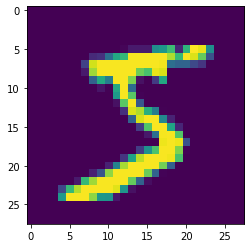

In [44]:
plt.imshow(X_train[0])

TypeError: Invalid shape (28, 28, 1) for image data

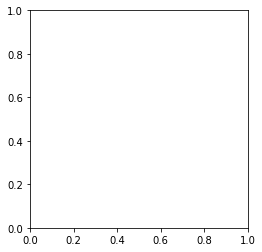

In [43]:
plt.imshow(X_train_new[0])

In [11]:
# reshape X_train and X_test TO (batch_size, channel, height, width)
#X_train_new = X_train_new.reshape(X_train_new.shape[0], 1, L, L).astype('float32')
X_train_new = X_train_new.reshape(X_train_new.shape[0], L, L,1).astype('float32')

#X_test_new = X_test_new.reshape(X_test_new.shape[0], 1, L, L).astype('float32')
X_test_new = X_test_new.reshape(X_test_new.shape[0],L, L,1).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train_new = X_train_new / 255

X_test_new = X_test_new / 255

#split test set to val and test set
X_train_new, X_val_new, y_train, y_val = train_test_split(X_train_new, y_train, test_size=0.1)
                                                          #,random_state=0)



In [12]:
X_train_new.shape

(54000, 28, 28, 1)

In [22]:
X_test_new.shape

(10000, 28, 28, 1)

In [54]:
# one-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)



In [55]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(60000, 10)
(10000, 10)
(6000, 10)


In [15]:
# Define model

In [16]:
L

28

In [18]:
# epoch_num = 20
# batch_size = 256
# optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, 
#                             decay=0.0, amsgrad=False)


# model = create_neural_network_model(size, opt=optimizer)

# # model.save('models/experiment_{}.{}_.h5'.format(experiment_index, experiment_subindex))

# model.summary()

In [19]:
#model for shuffle pixel
import keras
input_shape=(L,L,1)
num_classes=10


model = Sequential()
#one block look like VGG
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [20]:
batch_size = 128
num_classes = 10
epochs = 12

model.fit(X_train_new, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val_new, y_val))


Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 49s 901us/step - loss: 0.5314 - accuracy: 0.8324 - val_loss: 0.2056 - val_accuracy: 0.9362
Epoch 2/12
54000/54000 [==============================] - 48s 883us/step - loss: 0.2138 - accuracy: 0.9370 - val_loss: 0.1283 - val_accuracy: 0.9618
Epoch 3/12
54000/54000 [==============================] - 46s 844us/step - loss: 0.1572 - accuracy: 0.9531 - val_loss: 0.1087 - val_accuracy: 0.9638
Epoch 4/12
54000/54000 [==============================] - 48s 880us/step - loss: 0.1238 - accuracy: 0.9626 - val_loss: 0.0947 - val_accuracy: 0.9685
Epoch 5/12
54000/54000 [==============================] - 48s 895us/step - loss: 0.1063 - accuracy: 0.9674 - val_loss: 0.0876 - val_accuracy: 0.9715
Epoch 6/12
54000/54000 [==============================] - 47s 879us/step - loss: 0.0907 - accuracy: 0.9713 - val_loss: 0.0854 - val_accuracy: 0.9737
Epoch 7/12
54000/54000 [==============================] -

NameError: name 'x_test' is not defined

In [23]:
score = model.evaluate(X_test_new, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08368938590841099
Test accuracy: 0.9786999821662903


In [24]:
score = model.evaluate(X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1), y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 674.0955688476563
Test accuracy: 0.07590000331401825


In [56]:
#model for origin pixel
import keras
input_shape=(L,L,1)
num_classes=10


model0 = Sequential()
#one block look like VGG
model0.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model0.add(Conv2D(64, (3, 3), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2)))
model0.add(Dropout(0.25))

model0.add(Flatten())
model0.add(Dense(128, activation='relu'))
model0.add(Dropout(0.5))
model0.add(Dense(num_classes, activation='softmax'))

model0.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

batch_size = 128
num_classes = 10
epochs = 12



X_train = X_train.reshape(X_train.shape[0], L, L,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],L, L,1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255


#split test set to val and test set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [57]:
X_train.shape

(54000, 28, 28, 1)

In [58]:
X_val.shape

(6000, 28, 28, 1)

In [59]:
y_train.shape

(54000, 10)

In [60]:
y_val.shape

(6000, 10)

In [61]:

model0.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))


Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 83s 2ms/step - loss: 0.2889 - accuracy: 0.9108 - val_loss: 0.0722 - val_accuracy: 0.9765
Epoch 2/12
54000/54000 [==============================] - 78s 1ms/step - loss: 0.0916 - accuracy: 0.9724 - val_loss: 0.0492 - val_accuracy: 0.9830
Epoch 3/12
54000/54000 [==============================] - 75s 1ms/step - loss: 0.0701 - accuracy: 0.9793 - val_loss: 0.0369 - val_accuracy: 0.9872
Epoch 4/12
54000/54000 [==============================] - 79s 1ms/step - loss: 0.0578 - accuracy: 0.9830 - val_loss: 0.0322 - val_accuracy: 0.9883
Epoch 5/12
54000/54000 [==============================] - 92s 2ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0294 - val_accuracy: 0.9903
Epoch 6/12
54000/54000 [==============================] - 108s 2ms/step - loss: 0.0450 - accuracy: 0.9868 - val_loss: 0.0305 - val_accuracy: 0.9893
Epoch 7/12
54000/54000 [==============================] - 109s 2ms/s